In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/NLP/NLP Coursework/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['best_lstm_model.h5', 'Preprocessed_test_set.csv', 'validation.tsv', 'test.tsv', 'train.tsv', 'processed_test_set_bert.csv', 'best_bert_model.pth', 'NLP Project - Fake News Detection.ipynb']


# Best Model no 1: LSTM

In [4]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [22]:
# Test set Path
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, 'Preprocessed_test_set.csv')

# Correctly load the preprocessed test data
test_df = pd.read_csv(csv_file_path)

# labels and the rest features
test_features = test_df.drop(columns=['label']).values
test_labels = test_df['label'].values

# Ensure all features are of type float32
test_features = test_features.astype('float32')

# Load the saved model - correct path usage
model_path = os.path.join(GOOGLE_DRIVE_PATH, 'best_lstm_model.h5')
model = load_model(model_path)

# Check shape and data types
print("Test features shape:", test_features.shape)
print("Test features dtype:", test_features.dtype)

# Predict probabilities for the test set
predictions = model.predict(test_features)

# Convert probabilities to binary predictions (1 if probability > 0.5, else 0)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(test_labels, predicted_classes)
print("Classification Report:")
print(class_report)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test features shape: (8267, 200)
Test features dtype: float32
259/259 [==============================] - 3s 9ms/step
Test Accuracy: 0.9670
Confusion Matrix:
[[4092  192]
 [  81 3902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4284
           1       0.95      0.98      0.97      3983

    accuracy                           0.97      8267
   macro avg       0.97      0.97      0.97      8267
weighted avg       0.97      0.97      0.97      8267

Test Loss: 0.3281
Test Accuracy: 0.9670


### Plotting the results

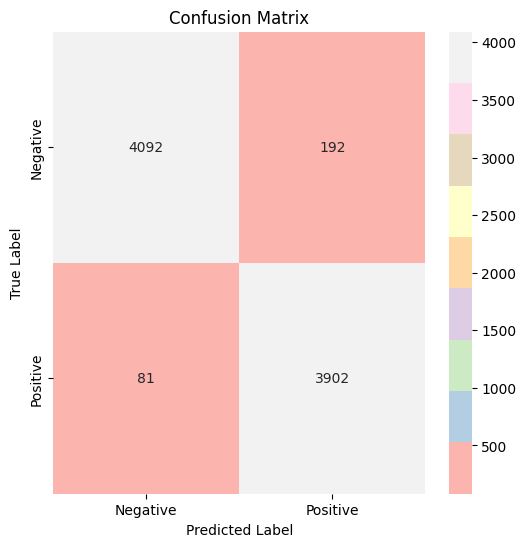

In [17]:
# Generate and plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

259/259 [==============================] - 3s 13ms/step


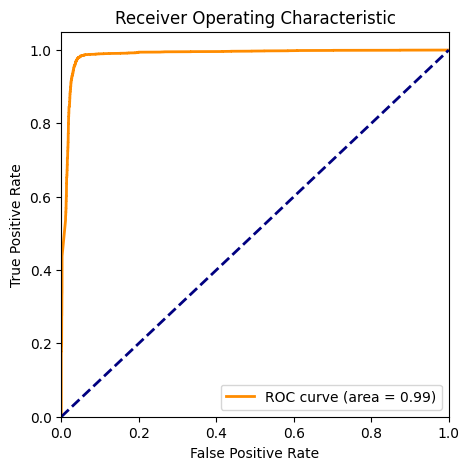

In [18]:
# Predict probabilities
prob_predictions = model.predict(test_features).flatten()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(test_labels, prob_predictions)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Create a DataFrame for error analysis
error_analysis_df = pd.DataFrame({
    'True Labels': test_labels,
    'Predicted Labels': predicted_classes
})

# include the original text or other features for deeper analysis:
if 'text' in test_df.columns:
    error_analysis_df['Text'] = test_df['text']

# Calculate if each prediction is correct
error_analysis_df['Status'] = error_analysis_df.apply(lambda row: 'Correct' if row['True Labels'] == row['Predicted Labels'] else 'Misclassified', axis=1)

# For correct predictions
correct_df = error_analysis_df[error_analysis_df['Status'] == 'Correct']
print("Correct Predictions:")
display(correct_df.head())




Correct Predictions:


,True Labels,Predicted Labels,Status
0,0,0,Correct
1,1,1,Correct
2,0,0,Correct
3,1,1,Correct
4,0,0,Correct


In [24]:
# To focus on misclassified examples, filter the DataFrame
misclassified_df = error_analysis_df[error_analysis_df['Status'] == 'Misclassified']
print("Misclassified Predictions:")
display(misclassified_df.head())

Misclassified Predictions:


,True Labels,Predicted Labels,Status
39,1,0,Misclassified
64,0,1,Misclassified
124,0,1,Misclassified
132,0,1,Misclassified
144,0,1,Misclassified


### Original test set Data frame

In [4]:
import pandas as pd

# You should replace 'test_df' with the actual variable name if it's different
test_path = os.path.join(GOOGLE_DRIVE_PATH, 'test.tsv')
test_df = pd.read_csv(test_path, delimiter='\t')

# List of specific indices you want to access
indices = [39, 64, 124, 132, 144]

# Accessing specific rows using .iloc
specific_rows = test_df.iloc[indices]

# Display the rows
print("Selected Rows from the Test Set:")
display(specific_rows)


Selected Rows from the Test Set:


,Unnamed: 0,title,text,subject,date,label
39,16575,Tears in rain as Thais gather for late king's ...,Somber crowds began gathering to pay final res...,worldnews,"October 24, 2017",1
64,2276,"BREAKING: Republicans Embrace Trump’s Lies, Wi...","On Sunday, Rep. Devin Nunes (R-Calif.) said th...",News,"March 5, 2017",0
124,11576,BRITISH COLUMNIST KATIE HOPKINS Has BRUTAL Rea...,"Mack Beggs, the transgender wrestler from Eule...",politics,"Feb 25, 2017",0
132,7391,Two LGBT Men Horrifically Burned During Anti-G...,Twenty-one-year-old Marquez Tolbert and his 23...,News,"March 20, 2016",0
144,2637,Donald Trump Vote Broke Up This Couple’s Marriage,The 2016 election has been particularly hard o...,News,"February 7, 2017",0


# Best Model no 2: BERT

In [14]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [15]:
# Define a custom BERT-based classifier
class BERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BERTClassifier, self).__init__()
        # Load the pretrained BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(0.5)
        # Linear layer for classification
        self.fc = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        # Forward pass through BERT and additional layers
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Dataset class to handle loading and processing of data
class TestDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df  # DataFrame containing the data
        self.tokenizer = tokenizer  # Tokenizer for encoding the text
        self.max_length = max_length  # Maximum length for the encoded sequences

    def __len__(self):
        return len(self.df)  # Returns the number of items in the dataset

    def __getitem__(self, idx):
        # Retrieves an item by index
        text = self.df.iloc[idx]['text']  # Text content
        label = self.df.iloc[idx]['label']  # Label for the text

        # Tokenize and encode the text to be suitable for BERT
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Determine if a GPU is available and set PyTorch to use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = BERTClassifier(num_classes=2)
# Construct the full path to the model file
model_path = os.path.join(GOOGLE_DRIVE_PATH, 'best_bert_model.pth')
# Load the model weights
model.load_state_dict(torch.load(model_path))
model.to(device)  # Move the model to the appropriate device
model.eval()  # Set the model to evaluation mode

# Load the test dataset
test_df_path = os.path.join(GOOGLE_DRIVE_PATH, 'processed_test_set_bert.csv')
test_df = pd.read_csv(test_df_path)  # Load the dataset from a CSV file
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Initialize the tokenizer
test_dataset = TestDataset(test_df, tokenizer)  # Create a dataset object
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # Create a DataLoader for handling batches

# Function to predict and evaluate using the trained model
def predict_and_evaluate(model, data_loader):
    model.eval()  # Ensure the model is in evaluation mode
    predictions = []
    actuals = []
    probabilities = []  # Store probabilities for ROC curve

    with torch.no_grad():  # Disable gradient computation for inference
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            # Assume outputs are logits or probabilities
            # Apply softmax to convert logits to probabilities if necessary
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Get the probability of the positive class
            _, preds = torch.max(outputs, dim=1)

            probabilities.extend(probs.cpu().numpy())
            predictions.extend(preds.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return predictions, actuals, probabilities

# Execute prediction and evaluation
predictions, actuals, probabilities = predict_and_evaluate(model, test_loader)

# Calculate and print various evaluation metrics
test_accuracy = accuracy_score(actuals, predictions)
conf_matrix = confusion_matrix(actuals, predictions)
class_report = classification_report(actuals, predictions, target_names=['Class 0', 'Class 1'])

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Test Accuracy: 0.9820909970958374
Confusion Matrix:
 [[1062   26]
 [  11  967]]
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      0.98      0.98      1088
     Class 1       0.97      0.99      0.98       978

    accuracy                           0.98      2066
   macro avg       0.98      0.98      0.98      2066
weighted avg       0.98      0.98      0.98      2066



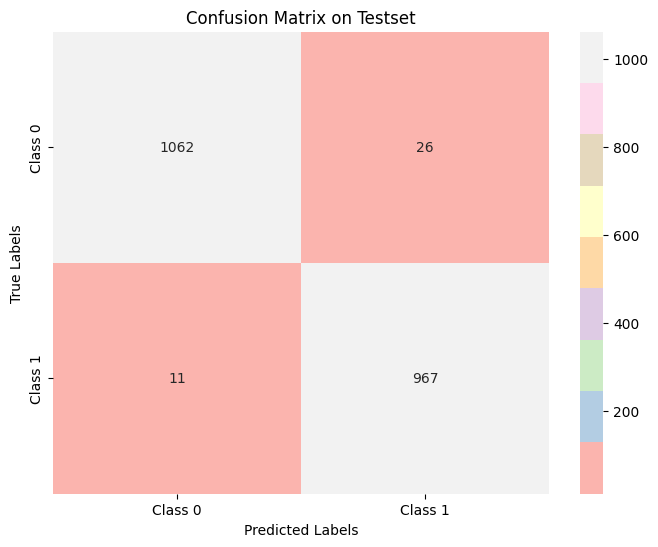

In [21]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix on Testset')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


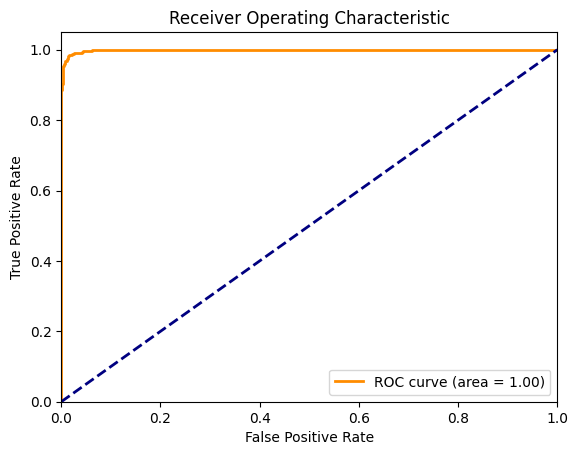

In [22]:
# Calculate ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(actuals, probabilities)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
# Creating a DataFrame for error analysis
error_analysis_df = pd.DataFrame({
    'True Labels': actuals,
    'Predicted Labels': predictions
})

# test_df contains a 'text' column with the original text data
if 'text' in test_df.columns:
    error_analysis_df['Text'] = test_df['text']

# Adding a 'Status' column to label each prediction as 'Correct' or 'Misclassified'
error_analysis_df['Status'] = error_analysis_df.apply(lambda row: 'Correct' if row['True Labels'] == row['Predicted Labels'] else 'Misclassified', axis=1)

# Filter for correct predictions and print them
correct_predictions_df = error_analysis_df[error_analysis_df['Status'] == 'Correct']
print("\nCorrect Predictions Sample:")
display(correct_predictions_df.head())



Correct Predictions Sample:


,True Labels,Predicted Labels,Text,Status
0,0,0,This is proof that the government will tax jus...,Correct
1,1,1,Philippines President Rodrigo Duterte has a pr...,Correct
2,1,1,Technology companies could face civil penaltie...,Correct
3,0,0,Shame on Teen Vogue! Maxine Waters was a guest...,Correct
4,0,0,This is just stunning! Free speech in our nati...,Correct


In [19]:
# Filter for misclassified predictions and print them
misclassified_predictions_df = error_analysis_df[error_analysis_df['Status'] == 'Misclassified']
print("\nMisclassified Predictions Sample:")
display(misclassified_predictions_df.head())


Misclassified Predictions Sample:


,True Labels,Predicted Labels,Text,Status
85,0,1,Hey Bernie The first step in fighting corrupti...,Misclassified
107,0,1,Much of the political world was shocked by the...,Misclassified
135,0,1,Former president Jimmy Carter denounced what h...,Misclassified
182,1,0,Donald Trump is taking some of his potential v...,Misclassified
216,0,1,Former CIA analyst and retired U.S. Army Reser...,Misclassified
